# Strava Activities in Italy

This is a VERY brief look at some simple data on some activities that I published on Strava when I was living in Catania, Italy and working with refugees. This notebook is a simple data exploration on these activities, with 2 visuals outlining my cycling and running patterns.

To start, Let's import the libraries needed to examine the data 

In [1]:
# Libraries
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# Import data
data = pd.read_csv('activities.csv', decimal=',')
data = data.dropna(thresh=len(data) - 2, axis=1)
data.columns

Index(['ID attività', 'Data dell’attività', 'Nome attività', 'Tipo attività',
       'Tempo complessivo', 'Distanza', 'Spostamenti vari', 'Nome del file',
       'Peso dell’atleta', 'Tempo in movimento', 'Distanza.1',
       'Velocità massima', 'Dislivello complessivo', 'Dislivello minimo',
       'Dislivello massimo', 'Pendenza massima', 'Pendenza media'],
      dtype='object')

In [2]:
# Let's get a feeling for this data
print('Shape of data: ', data.shape)
data.head()

Shape of data:  (44, 17)


,ID attività,Data dell’attività,Nome attività,Tipo attività,Tempo complessivo,Distanza,Spostamenti vari,Nome del file,Peso dell’atleta,Tempo in movimento,Distanza.1,Velocità massima,Dislivello complessivo,Dislivello minimo,Dislivello massimo,Pendenza massima,Pendenza media
0,1537701862,"28 apr 2018, 19:39:53",Giro pomeridiano,Ciclismo,11974,53.82,False,activities/1537701862.gpx,0.0,9417.0,53824.30078125,14.399999618530273,693.3389282226562,1516.9000244140625,2134.800048828125,14.600000381469727,0.0
1,1541822998,"30 apr 2018, 21:38:51",Primo giro del nord,Ciclismo,9682,52.27,False,activities/1541822998.gpx,0.0,8135.0,52278.6015625,12.699999809265137,257.2567138671875,1510.800048828125,1667.199951171875,10.699999809265137,-0.00019128285930491984
2,1558764452,"08 mag 2018, 16:07:41",Giro mattutino,Ciclismo,11047,58.89,False,activities/1558764452.gpx,0.0,10466.0,58892.80078125,18.299999237060547,975.0481567382812,1516.9000244140625,2439.39990234375,20.799999237060547,0.0005094001535326242
3,1565541423,"11 mag 2018, 19:11:52",Giro pomeridiano,Ciclismo,4219,23.24,False,activities/1565541423.gpx,0.0,3465.0,23239.80078125,11.100000381469727,103.75849914550781,1520.800048828125,1579.0,6.599999904632568,0.0
4,1645641516,"18 giu 2018, 00:16:53",Sunday funday,Corsa,3463,10.66,False,activities/1645641516.gpx,0.0,3188.0,10661.2998046875,5.5,29.817325592041016,1512.699951171875,1529.300048828125,10.699999809265137,0.006565803196281195


It looks like we've got the world's small dataset! It looks I did about 44 events over the course of the two years on Strava. Let's take a look at some summary statistics.


In [3]:
#Change time to be in minutes
data['Tempo complessivo'] = data['Tempo complessivo'].astype('float64')/60

#Pull out numerical columns
stats = data[['Tempo complessivo', 'Distanza', 'Peso dell’atleta', 'Tempo in movimento', 'Distanza.1',
              'Velocità massima', 'Dislivello complessivo', 'Dislivello minimo',
              'Dislivello massimo', 'Pendenza massima', 'Pendenza media']].astype('float64').describe()
print(stats)

       Tempo complessivo   Distanza  Peso dell’atleta  Tempo in movimento  \
count          44.000000  44.000000              42.0           44.000000   
mean           83.949621  17.069091               0.0         3859.818182   
std            68.772870  17.136309               0.0         3146.543975   
min             6.750000   1.610000               0.0          405.000000   
25%            26.745833   4.917500               0.0         1443.000000   
50%            65.550000   9.895000               0.0         2909.500000   
75%           115.679167  22.737500               0.0         5527.750000   
max           327.650000  70.340000               0.0        15590.000000   

         Distanza.1  Velocità massima  Dislivello complessivo  \
count     44.000000         44.000000               44.000000   
mean   17072.154710         10.656818              236.724109   
std    17136.320016          5.206677              339.771168   
min     1611.900024          2.600000         

I looks like I tended to do about half runs and half rides, judging by the percentiles of of the 'Distanza' distance column, with an average amount of time of around an hour. A distance mean of 17.1 and median of 9.8 remind us that there is more than one type of activity in this dataset. Let's sort this dataset by activity to get a better feel of the distribution.

# Measuring Runs

In [4]:
#Mark elevation change as a float
data['Dislivello complessivo'] = data['Dislivello complessivo'].astype('float64')

#Sorting by activity type
run = data[data['Tipo attività'] == 'Corsa']
cycle = data[data['Tipo attività'] == 'Ciclismo']

print('Running Data')
print(run[['Tempo complessivo', 'Distanza', 'Peso dell’atleta', 'Tempo in movimento', 'Distanza.1',
              'Velocità massima', 'Dislivello complessivo', 'Dislivello minimo',
              'Dislivello massimo', 'Pendenza massima', 'Pendenza media']].astype('float64').describe())

Running Data
       Tempo complessivo   Distanza  Peso dell’atleta  Tempo in movimento  \
count          25.000000  25.000000              25.0            25.00000   
mean           49.891333   7.961600               0.0          2681.92000   
std            40.194814   5.388457               0.0          2151.24979   
min             6.750000   1.610000               0.0           405.00000   
25%            22.883333   4.170000               0.0          1356.00000   
50%            27.783333   5.410000               0.0          1643.00000   
75%            78.233333  11.060000               0.0          4396.00000   
max           155.083333  22.570000               0.0          8813.00000   

         Distanza.1  Velocità massima  Dislivello complessivo  \
count     25.000000         25.000000               25.000000   
mean    7965.032036          8.568000              118.153977   
std     5387.631847          5.198695              132.408140   
min     1611.900024          4.40

The running data shows that most runs were between 20 and 80 minutes, with the longest at 2 1/2 hours. We also see that most runs were around 5km with a reasonably consistent pace. Very few runs had a large altitude change 'Dislivello complessivo'.

Let's plot a quick view of the runs, comparing distance, elevation, and time, to better understand the distribution.

Text(0.5, 1.0, 'Running Distances')

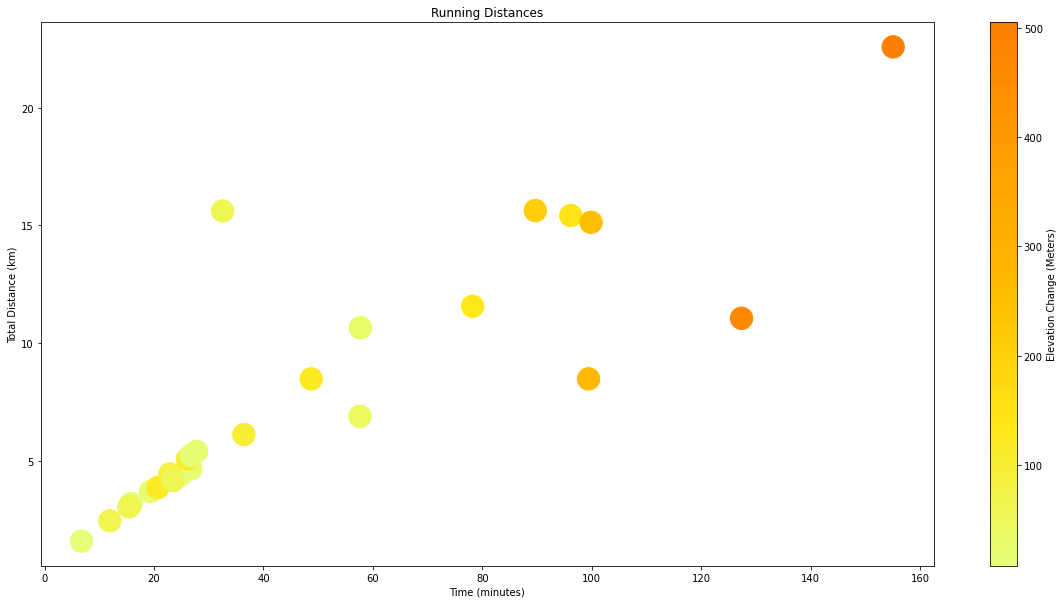

In [5]:
#Clearly we need to turn this into English, but we can have some fun none the less
cm =plt.cm.get_cmap('Wistia')

fig, ax = plt.subplots(figsize=(20, 10))
scatter = ax.scatter(x=run['Tempo complessivo'], y=run['Distanza'], c=run['Dislivello complessivo'], s=500, cmap=cm)
fig.colorbar(scatter, label='Elevation Change (Meters)')
ax.set_xlabel('Time (minutes)')
ax.set_ylabel('Total Distance (km)')
ax.set_title('Running Distances')

We can see that the data is quite skew to the right, with most runs at or below 5k, but a few really long runs with a high elevation change.

# Measuring Cycle Rides

We will use the same methodology as running here.

In [6]:
#Printing the description of cycling data
print('Cycling Data')
print(cycle[['Tempo complessivo', 'Distanza', 'Peso dell’atleta', 'Tempo in movimento', 'Distanza.1',
              'Velocità massima', 'Dislivello complessivo', 'Dislivello minimo',
              'Dislivello massimo', 'Pendenza massima', 'Pendenza media']].astype('float64').describe())

Cycling Data
       Tempo complessivo   Distanza  Peso dell’atleta  Tempo in movimento  \
count          17.000000  17.000000              17.0           17.000000   
mean          132.037255  31.958235               0.0         5561.352941   
std            76.030920  18.979875               0.0         3772.919740   
min            29.183333   6.990000               0.0         1086.000000   
25%            89.366667  17.140000               0.0         2895.000000   
50%           111.783333  29.280000               0.0         5041.000000   
75%           177.016667  43.420000               0.0         6813.000000   
max           327.650000  70.340000               0.0        15590.000000   

         Distanza.1  Velocità massima  Dislivello complessivo  \
count     17.000000         17.000000               17.000000   
mean   31960.865091         14.476471              419.673275   
std    18980.813952          2.141416              472.517264   
min     6990.899902         11.10

Text(0.5, 1.0, 'Cycling Distances')

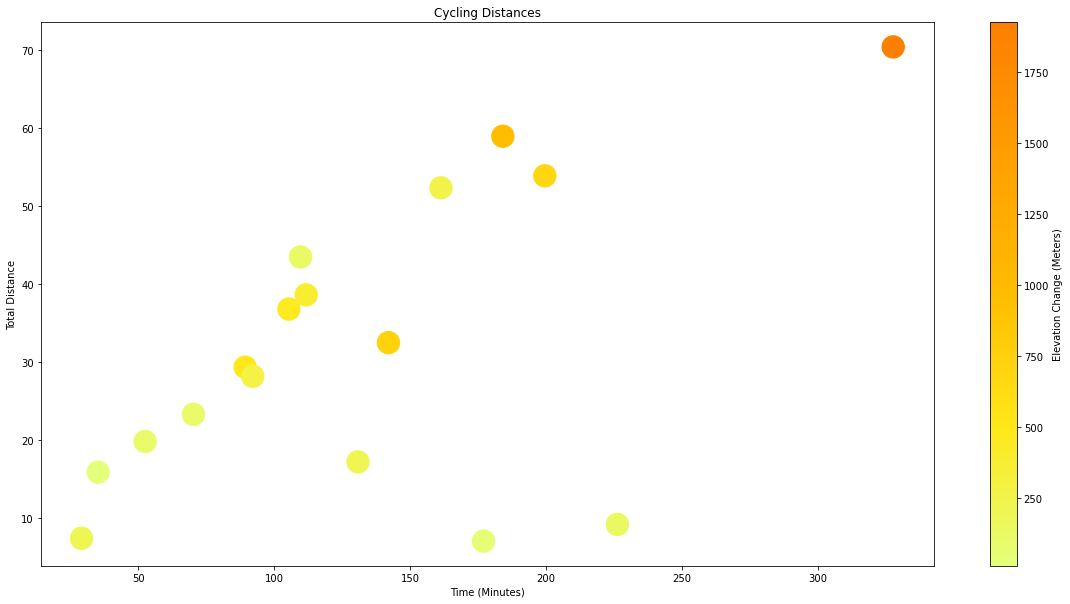

In [7]:
# Comparing distance, elevation, and time
cm =plt.cm.get_cmap('Wistia')

fig, ax = plt.subplots(figsize=(20, 10))
scatter = ax.scatter(x=cycle['Tempo complessivo'], y=cycle['Distanza'], c=cycle['Dislivello complessivo'], s=500, cmap=cm)
fig.colorbar(scatter, label='Elevation Change (Meters)')
ax.set_xlabel('Time (Minutes)')
ax.set_ylabel('Total Distance')
ax.set_title('Cycling Distances')

Here we see a similar distribution on cycle rides as running, but with one outlier with a high time and total distance. I will always remember this as one of the hardest rides of my life, cycling up to mount Etna in Sicily (https://www.visitsicily.info/en/il-monte-etna-2/) towards a famous tourist spot called Rifugio Sapienza

# Conclusion
I enjoyed this fun, brief look at my own strava data, better understanding some of the trends that exist in my exercise habits. I conclude that most of the time, I enjoy going moderate distances around 5k running, and around 30k biking, but on occasion like to push it to longer runs and rides. Thanks for joining me on this small journey through the world's smallest dataset!